In [123]:
#Importing the libraries
from ExoPSI import exopsi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Initializing the class
exopsi = exopsi()

In [130]:
#Loading the dataset
P_df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
new_df = P_df.loc[P_df['P_TEMP_SURF'].isna()==False]
new_df = new_df.loc[new_df['P_RADIUS'].isna()==False]
new_df = new_df.loc[new_df['P_MASS'].isna()==False]
new_df = new_df.loc[new_df['P_ESCAPE'].isna()==False]
new_df = new_df.loc[new_df['P_NAME'].isna()==False]
P_df = new_df
red_df = P_df.loc[:,['P_NAME','P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']]
red_df.to_csv("reduced phl3.csv")
P_df = red_df
print(P_df)

             P_NAME  P_RADIUS    P_MASS  P_ESCAPE  P_TEMP_SURF
0       Wolf 1061 d   2.69040  7.700972  1.691860    130.67525
1        GJ 667 C g   1.98417  4.449592  1.497513    132.81909
2          GJ 682 c   2.89218  8.698952  1.734286    144.94132
3      TRAPPIST-1 h   0.75107  0.327363  0.660198    177.38202
4         Kapteyn c   2.54467  6.992216  1.657646    183.18249
...             ...       ...       ...       ...          ...
2328   Kepler-929 b   1.10979  1.411156  1.127631   2707.51020
2329  Kepler-1373 b   1.15463  1.655884  1.197550   2887.77290
2330       KOI-55 c   0.86317  0.667439  0.879341   7220.44430
2331       KOI-55 b   0.76228  0.444959  0.764017   8126.34200
5220          Earth   1.00000  1.000000  1.000000    288.00000

[2273 rows x 5 columns]


In [131]:
C_df = pd.read_csv(r"Planet Type.csv")
C_df = C_df.set_index('Planet Type')
print(C_df)

             Min. Radius (EU)  Max. Radius (EU)  Min. Mass (EU)  \
Planet Type                                                       
Subterran                 0.4               0.8             0.1   
Terran                    0.8               1.6             0.5   
Superterran               1.6               2.5             3.0   

             Max. Mass (EU)  Min. Escape (EU)  Max. Escape (EU)  \
Planet Type                                                       
Subterran               0.5              0.35              1.11   
Terran                  3.0              0.56              1.93   
Superterran            10.0              1.09              2.50   

             Ref Val Rad (EU)  Ref Val Mass (EU)  Ref Val Esc (EU)  
Planet Type                                                         
Subterran                0.53              0.109              0.45  
Terran                   1.00              1.000              1.00  
Superterran              2.37              8.920    

In [132]:
O_df = pd.read_csv(r"reduced thermobase.csv")
O_df = O_df.set_index('Name')
print(O_df)

              Unnamed: 0  Min. Temp. (K)  Max. Temp. (K)  \
Name                                                       
Colwellia              0             253             293   
Methanopyrus           1             357             395   

              Avg. Optimum Temp. (K)  
Name                                  
Colwellia                        282  
Methanopyrus                     371  


In [133]:
for j in O_df.index:
    print(j)
    for i in C_df.index:
        print(i)
        upper_lims=[C_df.loc[i,'Max. Radius (EU)'],C_df.loc[i,'Max. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Max. Temp. (K)']]
        lower_lims = [C_df.loc[i,'Min. Radius (EU)'],C_df.loc[i,'Min. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Min. Temp. (K)']]
        ref_val = [C_df.loc[i,'Ref Val Rad (EU)'],C_df.loc[i,'Ref Val Mass (EU)'],C_df.loc[i,'Ref Val Esc (EU)'],O_df.loc[j,'Avg. Optimum Temp. (K)']]
        weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)
        C_df.loc[i,'W_Temp'] = weights[3]
    


Colwellia
Subterran
The calculated weight(s) is(are): [1.21, 1.05, 0.41, 6.8]
Terran
The calculated weight(s) is(are): [1.27, 0.42, 0.58, 6.8]
Superterran
The calculated weight(s) is(are): [2.92, 1.11, 1.66, 6.8]
Methanopyrus
Subterran
The calculated weight(s) is(are): [1.21, 1.05, 0.41, 8.98]
Terran
The calculated weight(s) is(are): [1.27, 0.42, 0.58, 8.98]
Superterran
The calculated weight(s) is(are): [2.92, 1.11, 1.66, 8.98]


C:\Users\mailm\AppData\Local\Temp\ipykernel_14644\3488777606.py:4: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)


Colwellia
Subterran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


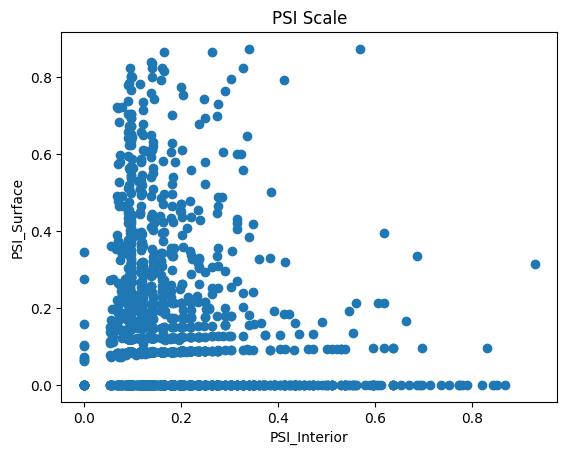

Terran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


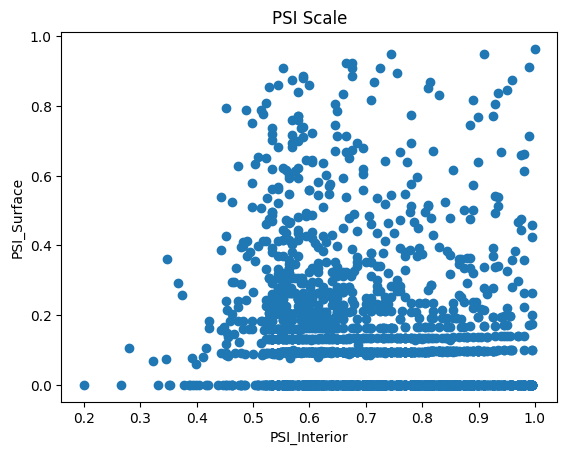

Superterran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


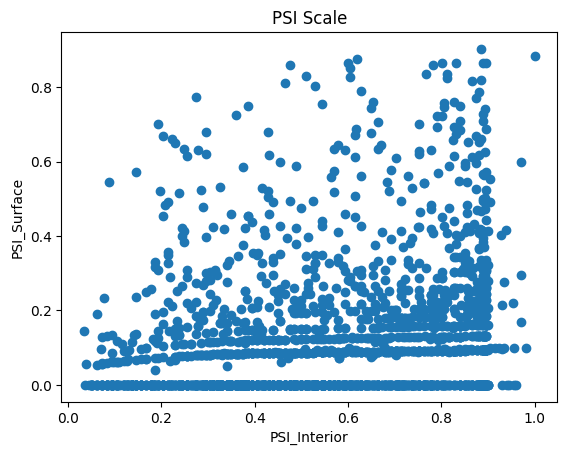

Methanopyrus
Subterran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


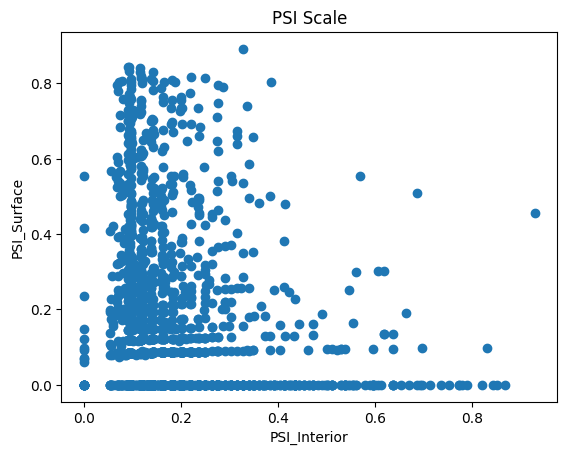

Terran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


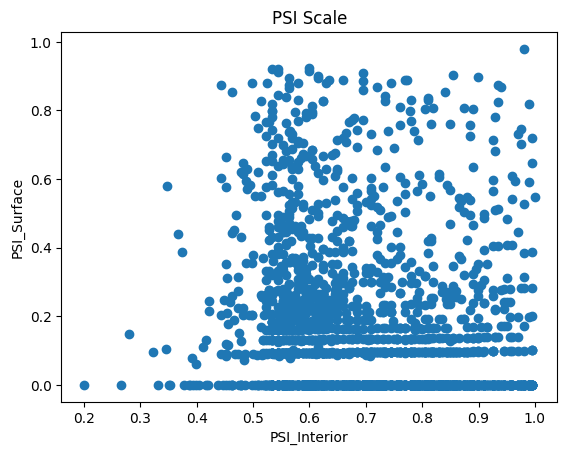

Superterran


C:\Users\mailm\AppData\Roaming\Python\Python39\site-packages\ExoPSI\exopsi.py:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


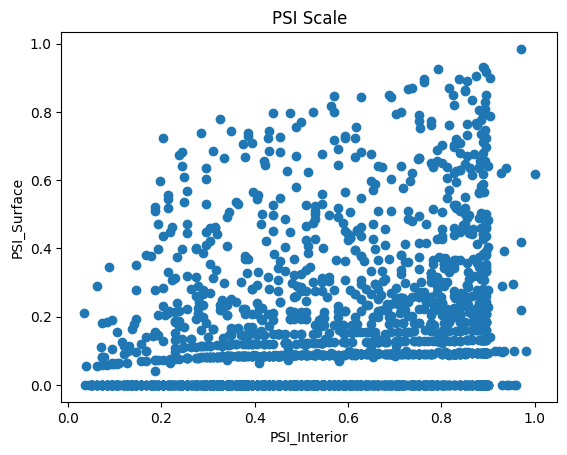

In [134]:
options = {}
options['strings_to_formulas'] = False
options['strings_to_urls'] = False
writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)
for j in O_df.index:
    print(j)
    for i in C_df.index:
        print(i)
        upper_lims=[C_df.loc[i,'Max. Radius (EU)'],C_df.loc[i,'Max. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Max. Temp. (K)']]
        lower_lims = [C_df.loc[i,'Min. Radius (EU)'],C_df.loc[i,'Min. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Min. Temp. (K)']]
        ref_val = [C_df.loc[i,'Ref Val Rad (EU)'],C_df.loc[i,'Ref Val Mass (EU)'],C_df.loc[i,'Ref Val Esc (EU)'],O_df.loc[j,'Avg. Optimum Temp. (K)']]
        PSI_data = exopsi.calc_psi(P_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']],
                            upper_lims,lower_lims,ref_val,0.8,
                            surf_param=['P_ESCAPE','P_TEMP_SURF'],
                            int_param=['P_RADIUS','P_MASS'],
                            p_index=P_df.loc[:,'P_NAME'])
        if ('/' in i):
            i = i.replace('/','_')
        if len(i) > 31:
            i = i[0:31]
        PSI_data.to_excel(writer, sheet_name="{}_{}".format(j,i),index=False)
        exopsi.psi_scale(PSI_data)
writer.save()


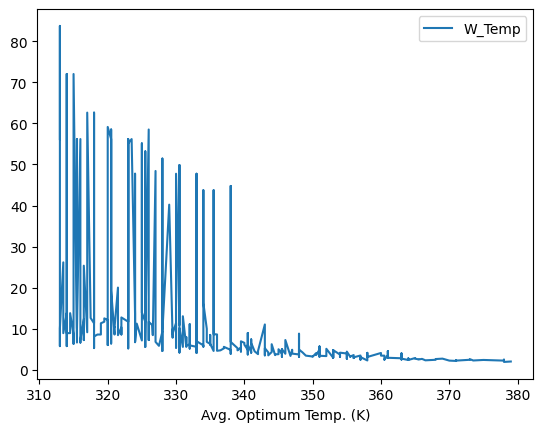

In [63]:
O_df=O_df.sort_values('Avg. Optimum Temp. (K)',ascending=True)
O_df.plot(x = 'Avg. Optimum Temp. (K)', y = 'W_Temp')
plt.show()

In [ ]:
pre_df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
pre_df = pre_df.loc[pre_df['P_TEMP_SURF'].isna()==False]